In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

**Note:** This notebook can run using TensorFlow 2.5.0

In [ ]:
#!pip install tensorflow==2.5.0

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
from tensorflow.keras import regularizers
# Figure out how to import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [ ]:
tokenizer = Tokenizer()

# sonnets.txt
!gdown --id 108jAePKK4R3BVYBbYJZ32JWUwxeMg20K

data = open('./sonnets.txt').read()

Downloading...
From: https://drive.google.com/uc?id=108jAePKK4R3BVYBbYJZ32JWUwxeMg20K
To: /content/sonnets.txt
100% 93.6k/93.6k [00:00<00:00, 79.4MB/s]


In [ ]:
corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
total_words

3211

In [ ]:
# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [ ]:
tf.keras.backend.clear_session()

### START CODE HERE
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len - 1 ))
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
### END CODE HERE
    
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 100)           321100    
                                                                 
 bidirectional (Bidirectiona  (None, 10, 300)          301200    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 10, 300)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 200)              320800    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1605)              322605    
                                                                 
 dense_1 (Dense)             (None, 3211)              5

In [ ]:
 history = model.fit(predictors, label, epochs=200, verbose=1)

Epoch 1/200
484/484 [==============================] - 12s 12ms/step - loss: 6.9655 - accuracy: 0.0202
Epoch 2/200
484/484 [==============================] - 6s 12ms/step - loss: 6.5118 - accuracy: 0.0228
Epoch 3/200
484/484 [==============================] - 6s 12ms/step - loss: 6.4136 - accuracy: 0.0243
Epoch 4/200
484/484 [==============================] - 6s 12ms/step - loss: 6.2949 - accuracy: 0.0286
Epoch 5/200
484/484 [==============================] - 6s 12ms/step - loss: 6.1894 - accuracy: 0.0363
Epoch 6/200
484/484 [==============================] - 6s 12ms/step - loss: 6.0909 - accuracy: 0.0389
Epoch 7/200
484/484 [==============================] - 6s 12ms/step - loss: 6.0020 - accuracy: 0.0410
Epoch 8/200
484/484 [==============================] - 6s 12ms/step - loss: 5.8980 - accuracy: 0.0457
Epoch 9/200
484/484 [==============================] - 6s 12ms/step - loss: 5.7787 - accuracy: 0.0522
Epoch 10/200
484/484 [==============================] - 6s 12ms/step - loss: 5.65

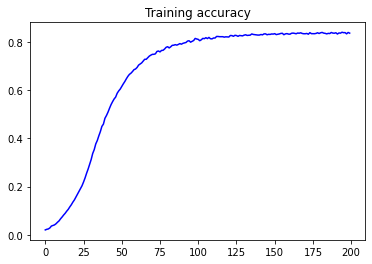

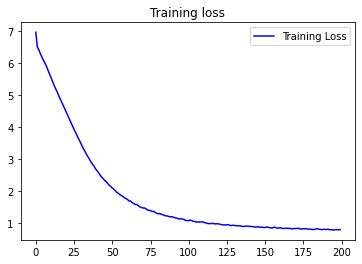

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [ ]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope and form to store now find bright store or spies lover plot forgot with loss with thine eye ' are made with travel needing gone with this thought ' still be made so seat in thee hid me doth end now sits held make stay strange glory in sun every rotten race loss to stay strange high or place in many stay still bear many grossly lose loss in woe light light young be forgot exchanged no sight canst make thine eye write not dear heart ' still away away more repair into my deeds new shade hour or doubt
